In [20]:
# K-MEANS CLUSTERING IN PYTHON

# The following lines import the necessary packages. You can ignore them.
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score


# This program performs a k-means clustering on data stored in a csv file,

# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file clustering_example_data.csv for reference.

# [Actually, the file can have more than two columns. The clustering works for data with many fields.
# However, it will only plot the first two columns against each other, for obvious reasons.]

# This program plots:
#   - A scatter plot of all the data, unclustered;
#   - A scatter plot of each cluster separately;
#   - A scatter plot of all the data, coloured by cluster.
# All of these plots are saved to your computer, in the same folder as this Python file.

# This program also saves a csv file of the original data, with an extra column,...
# indicating which cluster each point has been assigned to.

# The program also prints the silhouette score for your clustering...
# This is a measure of how well the data is clustered, from -1 (extremely poor) to 1 (extremely strong).

In [21]:
# SET THE FOLLOWING VARIABLES TO CONTROL HOW THE PROGRAM FUNCTIONS:

# CLUSTERING VARIABLES

# This line sets the number of clusters you want to find:
num_clusters = 2
# [Note that this program only plots in 7 different colours,...
# if you have more clusters, they will not all be distint in the final figure.]

# FILENAMES

# In the next line, replace clustering_example_data.csv with the filename of your data:
data_filename = 'clustering_example_data_simple.csv'

In [22]:
# The next line imports the data:
data = np.genfromtxt(data_filename,delimiter = ',')

#You can print it to have a look if you want:
#print(data)

In [52]:
# FIGURE PARAMETERS

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

# These lines set the figure title and axis labels and the font sizes:
fig_title = 'Figure Title'
x_label   = 'x-axis label'
y_label   = 'y-axis label'
title_fontsize = 15
label_fontsize = 10

# These lines set the limits of the x and y axes, so that all plots are on the same scale.
x_min, x_max = 0.5*np.min(data[:,0]), 1.1*np.max(data[:,0])
y_min, y_max = 0.5*np.min(data[:,1]), 1.1*np.max(data[:,1])


# This is a function that sets up each figure's x-limits and y-limits and axis labels.

def setup_figure():
    
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel(x_label,fontsize=label_fontsize)
    plt.ylabel(y_label,fontsize=label_fontsize)


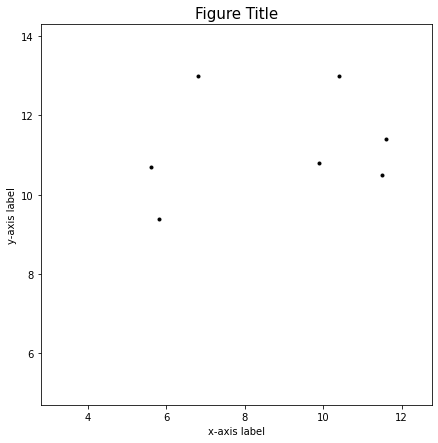

In [53]:
#Let's have a little look at our data from the off. 

#First extract the x and y values from the data:
x_values = data[:,0]
y_values = data[:,1]

#And then a cheeky plot:
plt.figure(0,figsize=(figure_width,figure_height))
setup_figure()
plt.xlabel(x_label,fontsize=label_fontsize)
plt.ylabel(y_label,fontsize=label_fontsize)
plt.title(fig_title,fontsize=title_fontsize)
plt.plot(x_values,y_values, 'k.')

In [54]:
# PERFORM CLUSTERING

# This line performs the k-means clustering:
kmeans_output = sklc.KMeans(n_clusters=num_clusters, n_init=1).fit(data)

#And have a look as a sanity check
print(kmeans_output)                                                

KMeans(n_clusters=2, n_init=1)


In [55]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

#Which we can now look at
print(clustering_ids_kmeans)

[1 1 0 0 1 0 1]


In [56]:
#That's just an ordered list of labels, which could be more helpful if they were attached to the data points. 

# These lines add the cluster IDs to the original data and save the data with these added cluster IDs.
complete_data_with_clusters = np.hstack((data,np.array([clustering_ids_kmeans]).T))

#Have a look at the result:
print(complete_data_with_clusters)

[[10.4 13.   1. ]
 [11.6 11.4  1. ]
 [ 5.6 10.7  0. ]
 [ 6.8 13.   0. ]
 [11.5 10.5  1. ]
 [ 5.8  9.4  0. ]
 [ 9.9 10.8  1. ]]


In [57]:
#Now, it would be handy to separate out our data so we have a list of the points within each cluster.  

# The loop below creates a separate data array for each cluster, and puts these arrays together in a list:
data_by_cluster = []

for i in range(num_clusters):
    
    this_data = []
    
    for row in complete_data_with_clusters:
        
        if row[-1] == i:
            this_data.append(row)
    
    this_data = np.array(this_data)
    
    data_by_cluster.append(this_data)
    
#Which gives the following:
data_by_cluster

[array([[ 5.6, 10.7,  0. ],
        [ 6.8, 13. ,  0. ],
        [ 5.8,  9.4,  0. ]]),
 array([[10.4, 13. ,  1. ],
        [11.6, 11.4,  1. ],
        [11.5, 10.5,  1. ],
        [ 9.9, 10.8,  1. ]])]

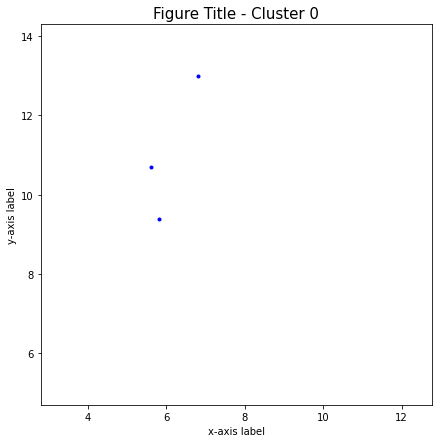

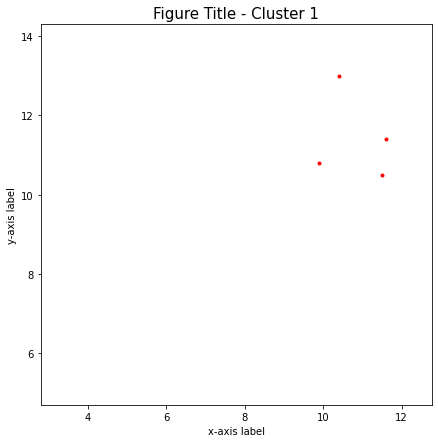

In [58]:
#Lovely! Now let's have a look at those clusters:
# FIGURES 1-N : SEPARATE CLUSTER PLOTS

# This is a list of colours to differentiate each cluster.
color_list = ['b','r','g','m','c','k','y']

# This loop goes through each cluster, plots it and saves it:
for i in range(num_clusters):
    
    plt.figure(i+1,figsize=(figure_width,figure_height))
    setup_figure()
    plt.title(fig_title + ' - Cluster ' + str(i),fontsize=title_fontsize)
    
    x_values = data_by_cluster[i][:,0]
    y_values = data_by_cluster[i][:,1]
    
    plt.plot(x_values,y_values,color_list[i % num_clusters] + '.')

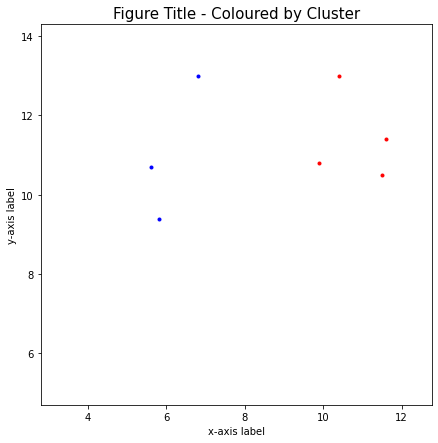

In [59]:
#Might be nice to have those on the same plot though.
# FIGURE N + 1 : COMBINED CLUSTER PLOT

# These lines create a plot with all the data points, coloured by cluster.
plt.figure(num_clusters + 1,figsize=(figure_width,figure_height))
setup_figure()
plt.title(fig_title + ' - Coloured by Cluster',fontsize=title_fontsize)

for i in range(num_clusters):
    
    x_values = data_by_cluster[i][:,0]
    y_values = data_by_cluster[i][:,1]
    
    plt.plot(x_values,y_values,color_list[i % num_clusters] + '.')

In [60]:
# SILHOUETTE SCORE

# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(data,clustering_ids_kmeans)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)


Silhouette Score: 0.5651142730328409
